In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import mne
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten

Extracting EDF parameters from C:\Users\aashutosh kumar\Downloads\files\S109\S109R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


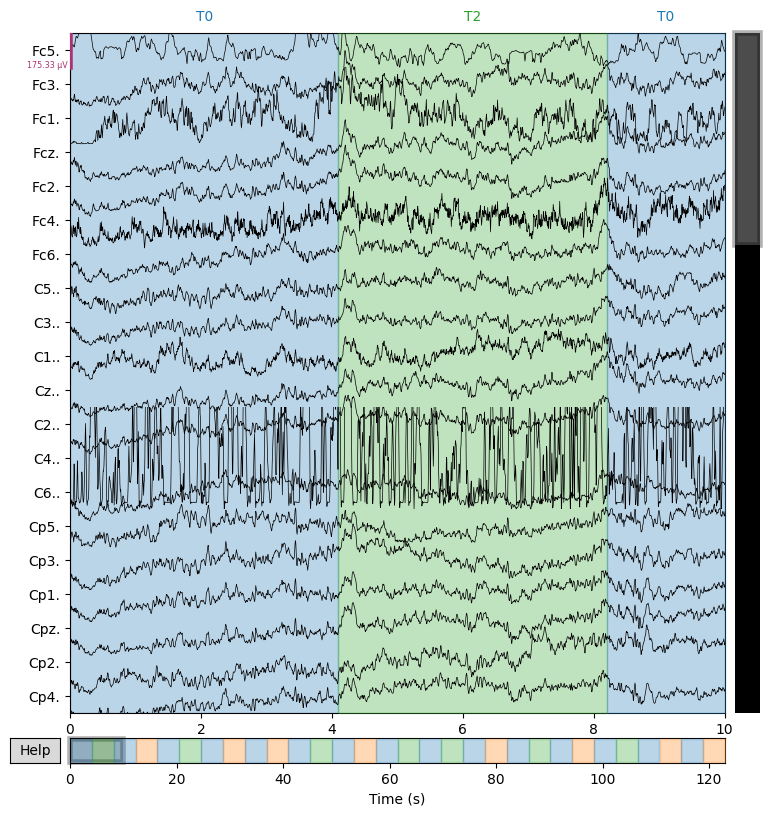

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\aashutosh kumar\AppData\Local\Temp\ipykernel_11628\3342660098.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
c:\a\envs\env2\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


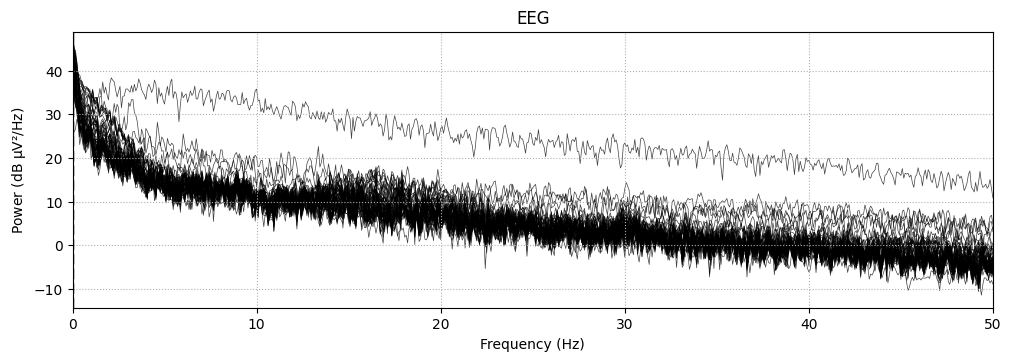

In [20]:
import mne
import matplotlib.pyplot as plt


edf_file = r"C:\Users\aashutosh kumar\Downloads\files\S109\S109R08.edf"

raw = mne.io.read_raw_edf(edf_file, preload=True)

print(raw.info)

raw.plot(duration=10, n_channels=20, scalings="auto")

raw.plot_psd(fmax=50) 

plt.show()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1057 samples (6.606 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband e

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


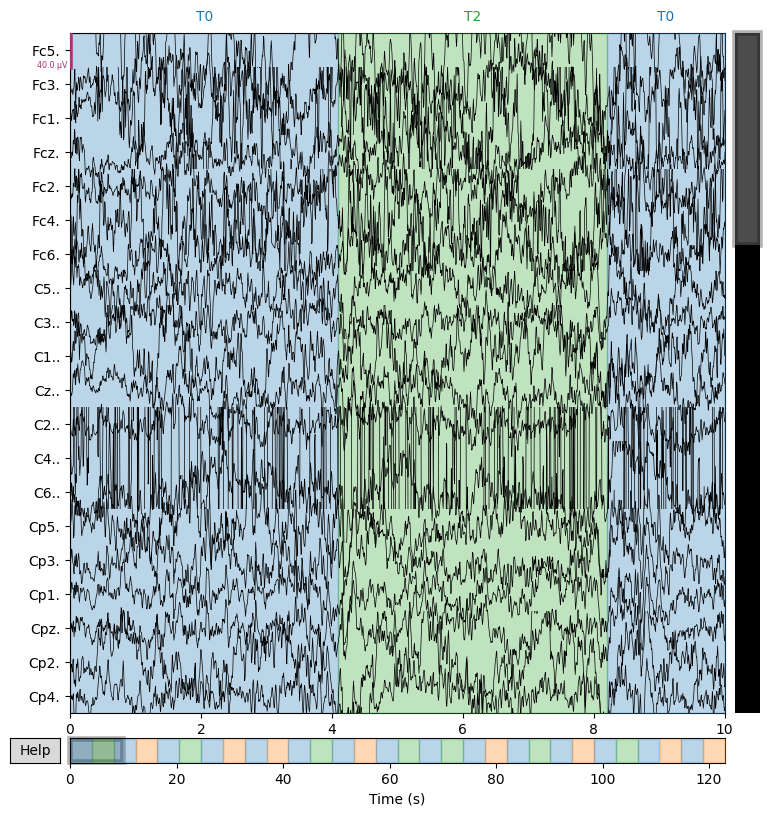

In [ ]:
raw.filter(l_freq=0.5, h_freq=50, fir_design="firwin")
raw.notch_filter(freqs=50)

raw.info["bads"] = [] 
raw.set_eeg_reference(ref_channels="average")
raw.plot(duration=10, n_channels=20, title="Filtered EEG Signals")
plt.show()


In [36]:
filtered_data, times = raw.get_data(return_times=True)

df_filtered = pd.DataFrame(filtered_data.T, columns=raw.ch_names)
df_filtered["Time (s)"] = times 

print("\nFiltered EEG Data Sample:")
df_filtered.head()


Filtered EEG Data Sample:


,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,Time (s)
0,-5.717472e-21,4.235165e-21,6.776264e-21,-2.329341e-21,-5.082198e-21,4.235165e-22,-2.117582e-21,2.541099e-21,-4.023406e-21,-1.101143e-20,...,-1.905824e-21,-2.541099e-21,-8.470329e-22,-5.717472e-21,2.435220e-21,3.176374e-21,-3.388132e-21,-9.317362e-21,-2.117582e-21,0.00000
1,6.223084e-06,-6.008820e-06,7.575385e-06,-5.151701e-06,-6.325504e-06,-1.765130e-05,-5.523321e-06,7.255451e-06,3.162922e-06,2.205699e-06,...,1.742630e-06,-1.355918e-06,-2.901056e-06,-3.514018e-06,-1.944551e-06,-6.101505e-06,-8.148469e-06,-8.324968e-06,-8.258968e-06,0.00625
2,1.556041e-05,-7.475497e-06,7.856858e-06,-8.230448e-06,-1.039993e-05,1.283268e-06,-3.972272e-06,3.359216e-06,1.285448e-06,6.054659e-06,...,5.448036e-06,-3.766035e-07,2.870308e-06,-5.118155e-07,1.118450e-06,4.018423e-06,1.022465e-06,-1.150931e-05,-9.280047e-07,0.01250
3,2.617532e-05,-8.519465e-06,1.065423e-06,-8.424224e-06,-1.500514e-05,-3.318372e-06,-5.178264e-06,1.310892e-05,4.127288e-06,1.803231e-06,...,9.661774e-06,-1.729041e-06,5.855858e-06,1.069300e-06,-6.454389e-07,1.343594e-05,8.641360e-06,-2.179291e-05,5.042029e-06,0.01875
4,4.020337e-05,-7.348775e-06,-1.937817e-06,-3.525462e-06,-1.346000e-05,-4.156334e-05,-6.585232e-06,3.849947e-05,1.259407e-05,-5.889902e-06,...,1.049017e-05,-5.220611e-06,-2.027301e-08,-5.999920e-06,-1.297879e-05,9.243700e-06,3.072682e-06,-3.432012e-05,1.612319e-06,0.02500


In [23]:
sampling_rate = int(raw.info["sfreq"])
print(f"EEG Sampling Rate: {sampling_rate} Hz")


EEG Sampling Rate: 160 Hz


In [24]:
raw.filter(0.5, 50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEDF | S109R08.edf, 64 x 19680 (123.0 s), ~9.7 MiB, data loaded>

In [25]:
df = pd.DataFrame(raw.get_data().T, columns=raw.ch_names)

df_filtered = df - df.mean()

In [26]:
def extract_time_features(df):
    features = {}
    for col in df.columns:
        features[f"{col}_mean"] = df[col].mean()
        features[f"{col}_std"] = df[col].std()
        features[f"{col}_kurtosis"] = df[col].kurtosis()
        features[f"{col}_skewness"] = df[col].skew()
    return features

def extract_frequency_features(df, fs):
    features = {}
    for col in df.columns:
        freqs, psd = welch(df[col], fs=fs, nperseg=fs)
        features[f"{col}_delta_power"] = np.sum(psd[(freqs >= 0.5) & (freqs < 4)])
        features[f"{col}_theta_power"] = np.sum(psd[(freqs >= 4) & (freqs < 8)])
        features[f"{col}_alpha_power"] = np.sum(psd[(freqs >= 8) & (freqs < 12)])
        features[f"{col}_beta_power"] = np.sum(psd[(freqs >= 12) & (freqs < 30)])
        features[f"{col}_gamma_power"] = np.sum(psd[(freqs >= 30) & (freqs < 50)])
    return features

In [27]:
time_features = extract_time_features(df_filtered)

freq_features = extract_frequency_features(df_filtered, fs=sampling_rate)


In [28]:
features_df = pd.DataFrame([{**time_features, **freq_features}])

In [35]:
if len(raw.annotations) > 0:
    print("EEG Annotations Found:", raw.annotations)

    annot_df = pd.DataFrame({
        'onset': raw.annotations.onset,  
        'duration': raw.annotations.duration,
        'label': raw.annotations.description 
    })
    
    print("Annotation Samples:")
    print(annot_df.head())

    label_encoder = LabelEncoder()
    annot_df["label_encoded"] = label_encoder.fit_transform(annot_df["label"])

else:
    print("No annotations found in the EEG file.")
    annot_df = None

EEG Annotations Found: <Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>
Annotation Samples:
   onset  duration label
0    0.0       4.1    T0
1    4.1       4.1    T2
2    8.2       4.1    T0
3   12.3       4.1    T1
4   16.4       4.1    T0


In [ ]:
segment_duration = 5  
fs = int(raw.info["sfreq"])  
segment_samples = segment_duration * fs  

X_segments = []
y_segments = []

for _, row in annot_df.iterrows():
    onset_sample = int(row["onset"] * fs)
    offset_sample = onset_sample + segment_samples

    if offset_sample > raw.n_times:
        continue  

    eeg_segment = raw.get_data(start=onset_sample, stop=offset_sample).T  

    time_features = extract_time_features(pd.DataFrame(eeg_segment, columns=raw.ch_names))
    freq_features = extract_frequency_features(pd.DataFrame(eeg_segment, columns=raw.ch_names), fs=fs)

    segment_features = {**time_features, **freq_features}
    X_segments.append(segment_features)
    y_segments.append(row["label_encoded"])  

In [32]:
X_features_df = pd.DataFrame(X_segments)
y_labels = np.array(y_segments)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_features_df, y_labels, test_size=0.2, random_state=42)

In [34]:
X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)